In [9]:
from typing import *
import matplotlib.pyplot as plt
import numpy as np
from autoencoder import AutoEncoder
from classifier import Classifier

In [10]:
epochs = 500
batch_size = 0.1
latent_size = 28
device = "cpu"
load_existing = False

In [11]:
if load_existing:
    auto_encoder = AutoEncoder.load("model.autoencoder")
else:
    auto_encoder = AutoEncoder(
        train_size=0.8,
        device=device,
        latent_size=latent_size,
        lr=0.001
    )
    auto_encoder.train(epochs=epochs, batch=batch_size, plot_stats=True)
    auto_encoder.save("model")

loss=0.10745751:   0%|          | 2/500 [00:00<01:20,  6.16it/s]

loss=0.02854092:  79%|███████▊  | 393/500 [00:53<00:19,  5.59it/s]

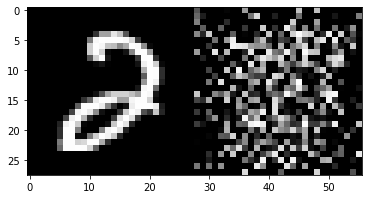

In [ ]:
I = 474
sample = auto_encoder.get_image(I)
prediction = auto_encoder.predict(sample)

plt.imshow(np.hstack([sample,prediction]), cmap="gray")

loss=2.31490493, accuracy=0.0974: 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]


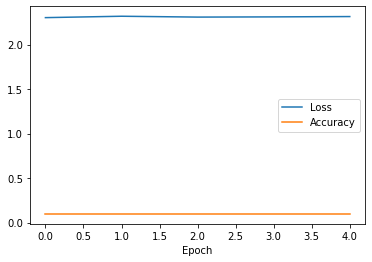

In [ ]:
if load_existing:
    classifier = Classifier.load("model.classifier")
else:
    classifier = Classifier(
        train_size=0.01,
        device=device,
        latent_size=latent_size,
        lr=0.001
    )
    classifier.train(epochs=epochs, batch=batch_size, plot_stats=True)
    classifier.save("model")

prediction=2


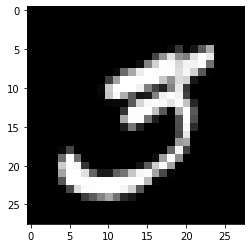

In [ ]:
I = 477
sample = classifier.get_image(I)
prediction = classifier.predict(sample)

plt.imshow(sample, cmap="gray", label="dsa")
print(f"{prediction=}")

loss=2.30476975, accuracy=0.1150: 100%|██████████| 5/5 [00:00<00:00, 15.43it/s]


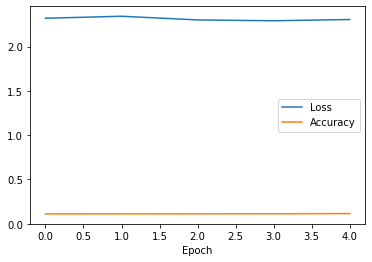

In [ ]:
if load_existing:
    pretrained_classifier = Classifier.load("pretrained.classifier")
else:
    pretrained_classifier = auto_encoder.to_classifier(train_size=0.01)
    pretrained_classifier.train(
        epochs=epochs,
        batch=batch_size,
        plot_stats=True,
        optimize_encoder=False
    )
    pretrained_classifier.save("pretrained")

prediction=0


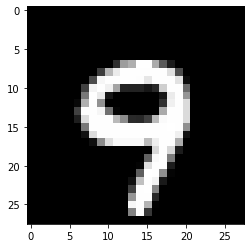

In [ ]:
I = 477
sample = pretrained_classifier.get_image(I)
prediction = pretrained_classifier.predict(sample)

plt.imshow(sample, cmap="gray", label="dsa")
print(f"{prediction=}")